<a href="https://colab.research.google.com/github/oneoftwo/generative_model_tutorial/blob/main/AE_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Autoencoder**

## **Import and Download Dataset**

In [1]:
import numpy as np
import random as random
import time as time
from tqdm import tqdm
from tqdm.notebook import tqdm

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
from torch import optim

from matplotlib import pyplot as plt
from matplotlib import cm

In [2]:
#==============================================================================#
# download dataset ============================================================#
batch_size = 128
download_root = './MNIST_DATASET'
train_dataset = MNIST(download_root, transform=transforms.ToTensor(), \
        train=True, download=True)
test_dataset = MNIST(download_root, transform=transforms.ToTensor(), \
        train=False, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, \
        shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, \
        shuffle=True)
#==============================================================================#

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST_DATASET/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_DATASET/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST_DATASET/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_DATASET/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST_DATASET/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_DATASET/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST_DATASET/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_DATASET/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## **Model**
Autoencoder model using CNN layers as encoder and inverse CNN layers for decoder

In [3]:
################################################################################
# autoencoder ##################################################################


# encoder for autoencoder, CNN based
class Encoder(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv_layers = nn.Sequential(\
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=1), \
            nn.ReLU(), \
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1), \
            nn.ReLU(), \
            nn.Conv2d(32, 64, kernel_size=2, stride=2, padding=0), \
            nn.ReLU(), \
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1), \
            nn.ReLU(), \
            nn.Conv2d(64, 128, kernel_size=2, stride=2, padding=0))
        
        self.fc = nn.Sequential(\
            nn.Linear(6 * 6 * 128, 100), \
            nn.ReLU(), \
            nn.Linear(100, 2))
        
    def forward(self, x):
        b = x.size(0)
        x = self.conv_layers(x)
        x = x.reshape(b, -1)
        x = self.fc(x)
        return x


# decoder for autoencoder
class Decoder(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc = nn.Sequential(\
            nn.Linear(2, 128), \
            nn.SiLU(), \
            nn.Linear(128, 256), \
            nn.SiLU(), \
            nn.Linear(256, 512), \
            nn.SiLU(), \
            nn.Linear(512, 28 * 28))
        
    def forward(self, x):
        b = x.size(0)
        x = self.fc(x)
        x = x.reshape(b, 1, 28, 28)
        x = torch.sigmoid(x)
        return x


# autoencoder
class Autoencoder(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()

    def forward(self, x):
        z = self.encoder(x)
        x_regen = self.decoder(z)
        return x_regen, z
    

################################################################################


#==============================================================================#
# sanity check ================================================================#
x = torch.rand(128, 1, 28, 28)
auto = Autoencoder()
x_regen, z = auto(x)
print('size of encoded latent: ', z.size())
print('size of regenerated image: ', x_regen.size())
#==============================================================================#

size of encoded latent:  torch.Size([128, 2])
size of regenerated image:  torch.Size([128, 1, 28, 28])


## **Train**

epoch  1
reconstruction loss: 12.447
epoch  2
reconstruction loss: 5.368
epoch  3
reconstruction loss: 5.218
epoch  4
reconstruction loss: 4.913


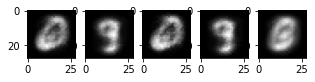

epoch  5
reconstruction loss: 4.688
epoch  6
reconstruction loss: 4.501
epoch  7
reconstruction loss: 4.444
epoch  8
reconstruction loss: 4.384
epoch  9
reconstruction loss: 4.329


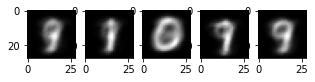

epoch  10
reconstruction loss: 4.258
epoch  11
reconstruction loss: 4.206
epoch  12
reconstruction loss: 4.168
epoch  13
reconstruction loss: 4.125
epoch  14
reconstruction loss: 4.098


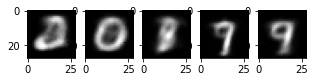

epoch  15
reconstruction loss: 4.071
epoch  16
reconstruction loss: 4.057
epoch  17
reconstruction loss: 4.041
epoch  18
reconstruction loss: 4.016
epoch  19
reconstruction loss: 4.002


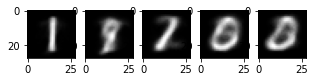

epoch  20
reconstruction loss: 3.975
epoch  21
reconstruction loss: 3.953
epoch  22
reconstruction loss: 3.936
epoch  23
reconstruction loss: 3.918
epoch  24
reconstruction loss: 3.904


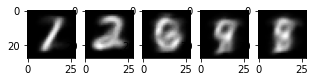

epoch  25
reconstruction loss: 3.893
epoch  26
reconstruction loss: 3.869
epoch  27
reconstruction loss: 3.847
epoch  28
reconstruction loss: 3.838
epoch  29
reconstruction loss: 3.828


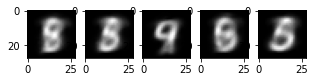

epoch  30
reconstruction loss: 3.813
epoch  31
reconstruction loss: 3.793
epoch  32
reconstruction loss: 3.784
epoch  33
reconstruction loss: 3.771
epoch  34
reconstruction loss: 3.757


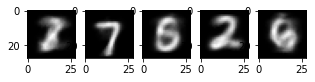

epoch  35
reconstruction loss: 3.743
epoch  36
reconstruction loss: 3.742
epoch  37
reconstruction loss: 3.722
epoch  38
reconstruction loss: 3.713
epoch  39
reconstruction loss: 3.700


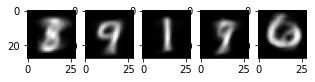

epoch  40
reconstruction loss: 3.698
epoch  41
reconstruction loss: 3.680
epoch  42
reconstruction loss: 3.664
epoch  43
reconstruction loss: 3.654
epoch  44
reconstruction loss: 3.645


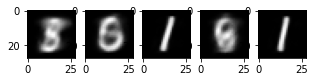

epoch  45
reconstruction loss: 3.635
epoch  46
reconstruction loss: 3.619
epoch  47
reconstruction loss: 3.615
epoch  48
reconstruction loss: 3.611
epoch  49
reconstruction loss: 3.588


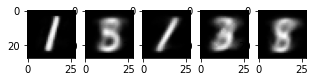

epoch  50
reconstruction loss: 3.575
epoch  51
reconstruction loss: 3.563
epoch  52
reconstruction loss: 3.555
epoch  53
reconstruction loss: 3.548
epoch  54
reconstruction loss: 3.541


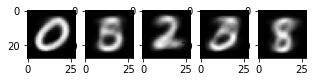

epoch  55
reconstruction loss: 3.532
epoch  56
reconstruction loss: 3.517
epoch  57
reconstruction loss: 3.518
epoch  58
reconstruction loss: 3.489
epoch  59
reconstruction loss: 3.491


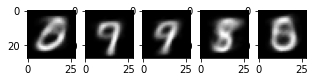

epoch  60
reconstruction loss: 3.492
epoch  61
reconstruction loss: 3.460
epoch  62
reconstruction loss: 3.452
epoch  63
reconstruction loss: 3.455
epoch  64
reconstruction loss: 3.442


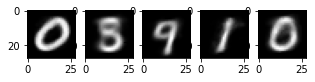

epoch  65
reconstruction loss: 3.447
epoch  66
reconstruction loss: 3.434
epoch  67
reconstruction loss: 3.423
epoch  68
reconstruction loss: 3.420
epoch  69
reconstruction loss: 3.414


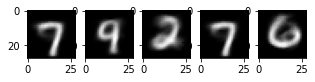

epoch  70
reconstruction loss: 3.396
epoch  71
reconstruction loss: 3.385
epoch  72
reconstruction loss: 3.392
epoch  73
reconstruction loss: 3.391
epoch  74
reconstruction loss: 3.379


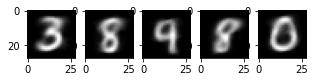

epoch  75
reconstruction loss: 3.376
epoch  76
reconstruction loss: 3.366
epoch  77
reconstruction loss: 3.352
epoch  78
reconstruction loss: 3.351
epoch  79
reconstruction loss: 3.333


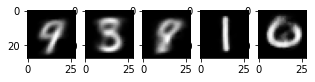

epoch  80
reconstruction loss: 3.331
epoch  81
reconstruction loss: 3.331
epoch  82
reconstruction loss: 3.316
epoch  83
reconstruction loss: 3.315
epoch  84
reconstruction loss: 3.314


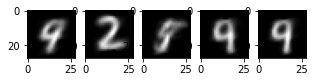

epoch  85
reconstruction loss: 3.310
epoch  86
reconstruction loss: 3.305
epoch  87
reconstruction loss: 3.300
epoch  88
reconstruction loss: 3.289
epoch  89
reconstruction loss: 3.284


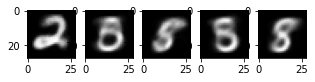

epoch  90
reconstruction loss: 3.287
epoch  91
reconstruction loss: 3.276
epoch  92
reconstruction loss: 3.262
epoch  93
reconstruction loss: 3.270
epoch  94
reconstruction loss: 3.261


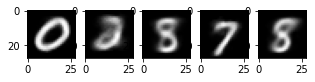

epoch  95
reconstruction loss: 3.253
epoch  96
reconstruction loss: 3.242
epoch  97
reconstruction loss: 3.245
epoch  98
reconstruction loss: 3.235
epoch  99
reconstruction loss: 3.223


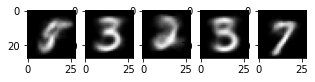

epoch  100
reconstruction loss: 3.234


In [4]:
################################################################################
# train model ##################################################################

# train single epoch
def train_autoencoder_single_epoch(model, dataloader, idx_epoch):
    model.train().cuda()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    epoch_loss = 0
    # train model
    for imgs, labels in dataloader:
        optimizer.zero_grad()
        imgs = imgs.cuda()
        imgs_regen, z = model(imgs)
        loss = criterion(imgs_regen, imgs)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    # plot regenerated imgs
    if idx_epoch % 5 == 0:
        fig = plt.figure(figsize=(5, 30))
        for idx in range(5):
            img = imgs_regen[idx].cpu().squeeze().detach().numpy()
            ax = fig.add_subplot(1, 5, idx + 1)
            ax.imshow(img, cmap=cm.gray)
        plt.show()
    return epoch_loss

# train model
def train_autoencoder(model, dataloader, n_epoch=30):
    loss_list = []
    model
    for idx_epoch in range(1, n_epoch + 1):
        epoch_loss = train_autoencoder_single_epoch(model, dataloader, idx_epoch)
        print('epoch ', idx_epoch)
        print('reconstruction loss: {:.3f}'.format(epoch_loss))
    return model

################################################################################


#==============================================================================#
# train model =================================================================#
model = Autoencoder()
trained_ae = train_autoencoder(model, test_loader, n_epoch=100)
#==============================================================================#

## **Plot Latenet Vector**
2 dimensional latenet vector (z) plotted for test dataset. The same labels are in similar latent space.

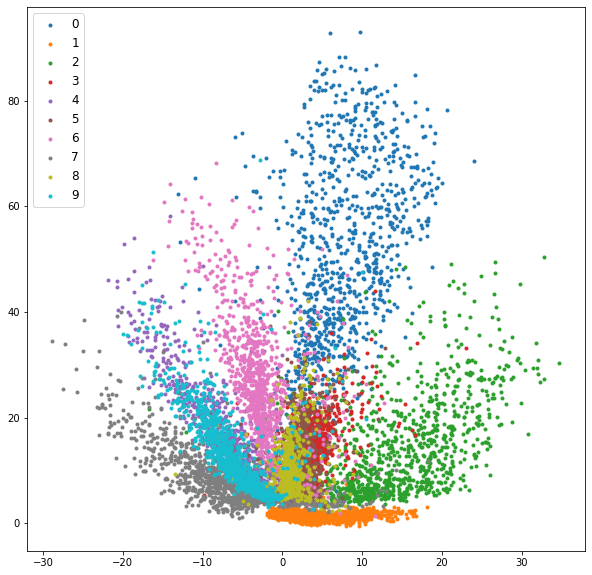

In [5]:
################################################################################
# plot fxns ####################################################################

def plot_scatter(model, loader):
    # get z sampling
    model.cpu()
    z_sampled = []
    label_sampled = []
    for imgs, labels in loader:
        _, z = model(imgs)
        z_sampled.append(z) # z[b 2]
        label_sampled.append(labels)
    del imgs
    z_to_plot = torch.cat(z_sampled, dim=0).cpu() # z[n 2]
    label_to_plot = torch.cat(label_sampled, dim=0)
    z_to_plot = z_to_plot[:,:]
    label_to_plot = label_to_plot[:]
    # plot
    x_data = z_to_plot[:,0].squeeze().detach().numpy()
    y_data = z_to_plot[:,1].squeeze().detach().numpy()
    label_data = label_to_plot[:].squeeze().detach().numpy()
    plot_group = [[[],[]] for _ in range(10)]
    for idx in range(len(x_data)):
        label = label_data[idx]
        plot_group[label][0].append(x_data[idx])
        plot_group[label][1].append(y_data[idx])
    plt.figure(figsize=(10,10))
    for number, group in enumerate(plot_group):
        x, y = group
        plt.scatter(x, y, label = str(number), marker='.')
    plt.legend(fontsize=12, loc='upper left')
    plt.show()
    return None
    
################################################################################


#==============================================================================#
# train model =================================================================#
plot_scatter(trained_ae, test_loader)
#==============================================================================#